In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"/content/ML4Eng_I_dataset_energy_measurement (1).txt")

In [3]:
df.describe()

,Axis,Feed,Path,Energy_Requirement
count,224.000000,225.000000,225.000000,226.000000
mean,2.093750,1759.200000,1.644444,0.060063
std,1.447173,887.559998,43.726604,0.163246
min,-5.000000,20.000000,-200.000000,-0.272149
25%,1.000000,1000.000000,-30.000000,0.012769
50%,2.000000,2000.000000,10.000000,0.038630
75%,3.000000,2500.000000,40.000000,0.063981
max,15.000000,3000.000000,150.000000,0.900000


In [4]:
df.dropna()
df.head(10)

,Axis,Feed,Path,Energy_Requirement
0,-1.0,20.0,120.0,0.600000
1,-5.0,100.0,150.0,0.700000
2,10.0,150.0,130.0,0.800000
3,15.0,50.0,-200.0,0.900000
4,1.0,500.0,10.0,0.009795
5,6.0,NaN,20.0,0.019462
6,NaN,500.0,30.0,0.029309
7,-2.0,500.0,NaN,0.038570
8,NaN,500.0,50.0,0.048310
9,1.0,500.0,60.0,0.057808


Text(0, 0.5, 'Total Quantity')

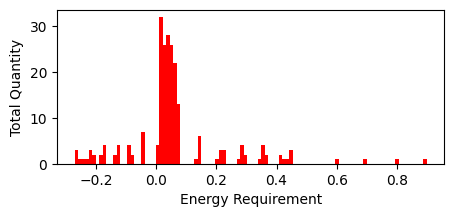

In [5]:
# plotting the target variable = energy requirement
%matplotlib inline
plt.figure(figsize = (5,2))
plt.hist(df.Energy_Requirement, bins=100, range = (df.Energy_Requirement.min(),df.Energy_Requirement.max()), color = 'Red')
plt.xlabel('Energy Requirement')
plt.ylabel('Total Quantity')

Text(0, 0.5, 'Total quantity')

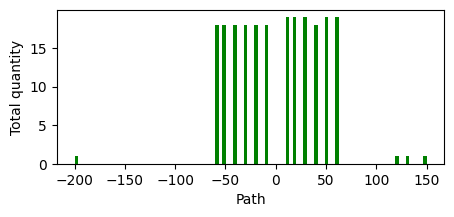

In [6]:
# plotting attribute/feature "Path"
plt.figure(figsize = (5,2))
plt.hist(df.Path, bins = 100, range = (df.Path.min(), df.Path.max()), color = 'Green')
plt.xlabel("Path")
plt.ylabel("Total quantity")

Text(0, 0.5, 'Total quantity')

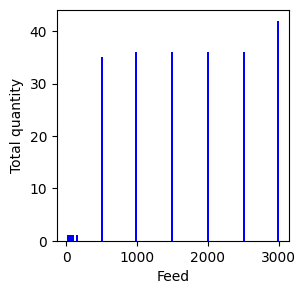

In [7]:
# plotting feature - Feed
plt.figure(figsize = (3,3))
plt.hist(df.Feed, bins = 100, range = (df.Feed.min(), df.Feed.max()), color = "Blue")
plt.xlabel("Feed")
plt.ylabel("Total quantity")

Text(0, 0.5, 'Total quantity')

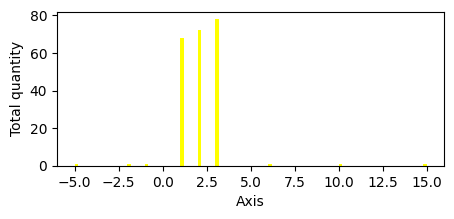

In [8]:
# plotting attribute/feature - Axis
%matplotlib inline
plt.figure(figsize = (5,2))
plt.hist(df.Axis, bins= 100, range = (df.Axis.min(),df.Axis.max()), color = "Yellow")
plt.xlabel("Axis")
plt.ylabel("Total quantity")

In [9]:
df = df.loc[(df.Axis>=1) & (df.Axis<=3) &
            (df.Feed >=500) & (df.Feed<= 3000) &
            (df.Path >=-60) & (df.Path<=60)
]

In [10]:
df.describe()

,Axis,Feed,Path,Energy_Requirement
count,218.000000,218.000000,218.000000,218.000000
mean,2.045872,1807.339450,0.321101,0.047884
std,0.818961,858.431366,39.072043,0.135879
min,1.000000,500.000000,-60.000000,-0.272149
25%,1.000000,1000.000000,-30.000000,0.012676
50%,2.000000,2000.000000,10.000000,0.038600
75%,3.000000,2500.000000,37.500000,0.061995
max,3.000000,3000.000000,60.000000,0.450567


In [11]:
X_multi = df.drop("Energy_Requirement",1)

<ipython-input-11-c4ad81410454>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_multi = df.drop("Energy_Requirement",1)


In [12]:
Y_target = df.Energy_Requirement

In [13]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X_multi, Y_target, random_state=42)

In [14]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(163, 3) (163,) (55, 3) (55,)


In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lreg = LinearRegression()
lreg.fit(X_train, Y_train)


LinearRegression()

In [17]:
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)


In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [19]:
# calculating error for training data:
MSE_linear_train_data = mean_squared_error(Y_train, pred_train)
MAE_linear_train_data = mean_absolute_error(Y_train, pred_train)
print("MSE for training data=\n", MSE_linear_train_data)
print("MAE for training data=\n", MAE_linear_train_data)

MSE for training data=
 0.01167892485881179
MAE for training data=
 0.09121547964727232


In [20]:
#calculating error for testing data:
MSE_linear_test_data = mean_squared_error(Y_test, pred_test)
MAE_linear_test_data = mean_absolute_error(Y_test, pred_test)
print("MSE for testing data is= \n", MSE_linear_test_data)
print("MAE for testing data is= \n", MAE_linear_test_data)

MSE for testing data is= 
 0.013044389500115314
MAE for testing data is= 
 0.0905114994661013


In [ ]:
# Plotting residual error plot for linear regression model:
%matplotlib inline
plt.figure(figsize = (12,5))
train = plt.scatter(pred_train, (pred_train-Y_train), c ='b', alpha = 0.5)
test = plt.scatter(pred_test, (pred_test-Y_test), c ='y', alpha = 0.5)
plt.hlines(y=0, xmin = -0.5, xmax = 0.5)
plt.legend((train,test), ('Training', 'Testing'), loc = 'upper right')
plt.title('Residual plot for Linear regression model')
plt.xlabel('Target variable - Energy_Requirement')
plt.ylabel('Residual Value')

In [22]:
# Trying out Random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [23]:
rf.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [24]:
rf_pred_train = rf.predict(X_train)
rf_pred_test = rf.predict(X_test)

In [25]:
# Finding MAE and MSE of random forest model-  training data
MSE_rf_train_data = mean_squared_error(Y_train,rf_pred_train)
MAE_rf_train_data = mean_absolute_error(Y_train, rf_pred_train)
print("MSE = ", MSE_rf_train_data)
print("MAE = ", MAE_rf_train_data)

MSE =  6.31350011685033e-05
MAE =  0.0026605765337424903


In [34]:
# Finding MAE and MSE for test data
MAE_rf_test_data = mean_absolute_error(Y_test, rf_pred_test )
MSE_rf_test_data = mean_squared_error(Y_test, rf_pred_test)
print("Mae = ", MAE_rf_test_data)
print("MSE = ", MSE_rf_test_data)

Mae =  0.005907323690909195
MSE =  0.00017383678946808628


In [ ]:
# Plotting residual error plot for Random Forest model:
%matplotlib inline
plt.figure(figsize = (12,5))
train = plt.scatter(rf_pred_train, (rf_pred_train-Y_train), c ='b', alpha = 0.5)
test = plt.scatter(rf_pred_test, (rf_pred_test-Y_test), c ='y', alpha = 0.5)
plt.hlines(y=0, xmin = -0.5, xmax = 0.5)
plt.legend((train,test), ('Training', 'Testing'), loc = 'upper right')
plt.title('Residual plot for Random Forest model')
plt.xlabel('Target variable - Energy_Requirement')
plt.ylabel('Residual Value')


In [31]:
# Using Support Vector Regression now:
from sklearn.svm import SVR
svr = SVR()
# Training the model on training data
svr.fit(X_train,Y_train)
# Using SVR predict method on test data
svr_pred_train = svr.predict(X_train)
svr_pred_test = svr.predict(X_test)



In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
svr_MAE_train = mean_absolute_error(Y_train, svr_pred_train )
svr_MSE_train = mean_squared_error(Y_train, svr_pred_train)
svr_MAE_test = mean_absolute_error(Y_test, svr_pred_test)
svr_MSE_test = mean_squared_error(Y_test, svr_pred_test)
print("For training data, MAE is:",svr_MAE_train,"\n ,and MSE is:", svr_MSE_train)
print("For testing data, MAE is:",svr_MAE_test,"\n ,and MSE is:", svr_MSE_test)

For training data, MAE is: 0.08173011271299446 
 ,and MSE is: 0.013595253971989574
For testing data, MAE is: 0.0928492482136748 
 ,and MSE is: 0.01713173248228542


Text(0, 0.5, 'Residual value')

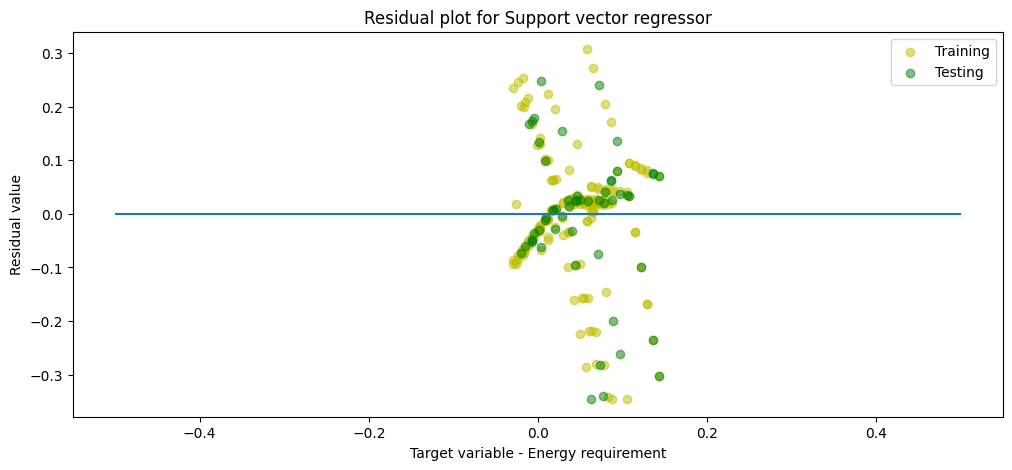

In [39]:
# Residual plot for Support Vector Regressor:
%matplotlib inline
plt.figure(figsize = (12,5))
train = plt.scatter(svr_pred_train, (svr_pred_train-Y_train),c = 'y', alpha = 0.5)
test = plt.scatter(svr_pred_test, (svr_pred_test-Y_test), c = 'g', alpha = 0.5)
plt.hlines(y = 0, xmin =-0.5, xmax = 0.5)
plt.legend((train,test),("Training", "Testing"), loc = ("upper right"))
plt.title("Residual plot for Support vector regressor")
plt.xlabel("Target variable - Energy requirement")
plt.ylabel("Residual value")

In [ ]:
# Visualization of all test results:
plt.figure(figsize = (12,5))
plt.bar(['MSE_LR'],[MSE_linear_test_data], color=['#4DBEEE'], label="Mean Square Error on Linear Regressor")
plt.bar(['MSE_SVR'],[svr_MSE_test], color = ['#0072BD'], label = "Mean Square error for SVR")
plt.bar(['MSE_RF'],[MSE_rf_test_data], color = ['#A2142F'], label = "Mean square Error for Random forest")


plt.bar(['MAE_LR'],[MAE_linear_test_data], color=['#D95319'], label="Mean Absolute Error on Linear Regressor")
plt.bar(['MAE_SVR'],[svr_MAE_test], color=['#EDB120'], label="Mean Absolute Error on SVR")
plt.bar(['MAE_RF'],[MAE_rf_test_data], color=['#77AC30'], label="Mean Absolute Error on Random Forest")

plt.title("Comparing performance MAE and MSE for different  Regression methods on test data")
plt.xlabel("Error")
plt.ylabel("Error values")
plt.show()


In [55]:
# Testing models for an example value

svr_deploy = svr.predict([[2,800,60]])
linear_deploy = lreg.predict([[2,800,60]])
rf_deploy = rf.predict([[2,800,60]])
print(svr_deploy,"\n", linear_deploy, rf_deploy)


[0.07227445] 
 [0.14243648] [0.05394835]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
